In [201]:
#Cell 1
#importing libraries
import numpy as np
import pandas as pd
import math
import operator
import random
import matplotlib.pyplot as plt
import warnings

In [202]:
#Cell 2
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance_to(self, other):
        return np.sqrt((self.x - other.x)**2 + (self.y - other.y)**2)
    
    def __repr__(self):
        return f"({self.x}, {self.y})"


In [203]:
#Cell 3
def create_distance_matrix(cities):
    n = len(cities)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                distance_matrix[i, j] = cities[i].distance_to(cities[j])
    return distance_matrix


In [204]:
#Cell 4
#citylist = [City(x=int(random.random() * 200), y=int(random.random() * 200)) for _ in range(25)]
citylist= [City(x=150,y=82),City(x=130,y=70),City(x=130,y=90),City(x=110,y=38),City(x=100,y=40),City(x=100,y=60),City(x=100,y=120),City(x=100,y=140),City(x=100,y=160),City(x=100,y=180),City(x=100,y=200),City(x=80,y=20),City(x=80,y=40),City(x=80,y=60),City(x=80,y=80),City(x=80,y=100),City(x=80,y=120),City(x=80,y=140),City(x=80,y=160),City(x=80,y=180),City(x=80,y=200),City(x=60,y=20),City(x=60,y=40),City(x=60,y=60),City(x=60,y=80)]
print("Cities : ", citylist)

distance_matrix = create_distance_matrix(citylist)


Cities :  [(150, 82), (130, 70), (130, 90), (110, 38), (100, 40), (100, 60), (100, 120), (100, 140), (100, 160), (100, 180), (100, 200), (80, 20), (80, 40), (80, 60), (80, 80), (80, 100), (80, 120), (80, 140), (80, 160), (80, 180), (80, 200), (60, 20), (60, 40), (60, 60), (60, 80)]


In [205]:
#Cell 5
# Parameters
num_ants = 10
num_iterations = 50
alpha = 1.0
beta = 2.0
rho = 0.5
Q = 1.0

In [206]:
#cell 6
#Helper functions
warnings.filterwarnings("ignore", category=RuntimeWarning) # Ignore RuntimeWarning
def initialize_pheromone_matrix(n):
    return np.ones((n, n)) / n

def calculate_probabilities(pheromones, distances, alpha, beta, visited, current_city):
    pheromone = np.copy(pheromones[current_city])
    pheromone[list(visited)] = 0.0
    visibility = 1 / distances[current_city]
    probabilities = np.power(pheromone, alpha) * np.power(visibility, beta)
    
    # Handle NaN or infinity in probabilities
    probabilities[np.isnan(probabilities)] = 0.0
    probabilities[np.isinf(probabilities)] = 0.0
    
    # Normalize probabilities to sum to 1 (if they are not already)
    if np.sum(probabilities) > 0:
        probabilities = probabilities / np.sum(probabilities)
    else:
        probabilities = np.ones_like(probabilities) / len(probabilities)
    
    return probabilities

def update_pheromones(pheromones, delta_pheromones, rho):
    return (1 - rho) * pheromones + delta_pheromones

In [207]:
#Cell 7
#Implementing ACO Using Meeting Strategy for TSP
def aco_meeting_strategy(cities, num_ants, num_iterations, alpha, beta, rho, Q):
    num_cities = len(cities)
    distances = create_distance_matrix(cities)
    pheromones = initialize_pheromone_matrix(num_cities)
    
    best_distance = float('inf')
    best_path = []
    
    for iteration in range(num_iterations):
        ant_paths = [[] for _ in range(num_ants)]
        tabu_list = [[] for _ in range(num_ants)]
        
        for k in range(num_ants):
            current_city = random.randint(0, num_cities - 1)
            ant_paths[k].append(current_city)
            tabu_list[k].append(current_city)
            visited = set(ant_paths[k])
            
            while len(ant_paths[k]) < num_cities:
                probabilities = calculate_probabilities(pheromones, distances, alpha, beta, visited, current_city)
                next_city = np.random.choice(range(num_cities), p=probabilities)
                
                ant_paths[k].append(next_city)
                tabu_list[k].append(next_city)
                visited.add(next_city)
                current_city = next_city
            
            if len(set(city for sublist in tabu_list for city in sublist)) >= num_cities // 2:
                combined_tour = []
                for ant in range(num_ants):
                    combined_tour.extend(tabu_list[ant])
                
                combined_tour = list(set(combined_tour))
                
                delta_pheromones = np.zeros((num_cities, num_cities))
                for i in range(len(combined_tour) - 1):
                    city_i = combined_tour[i]
                    city_j = combined_tour[i + 1]
                    delta_pheromones[city_i, city_j] += Q / distances[city_i, city_j]
                
                pheromones = update_pheromones(pheromones, delta_pheromones, rho)
                
                tabu_list = [[] for _ in range(num_ants)]
        
        for k in range(num_ants):
            tour_length = sum(distances[ant_paths[k][i], ant_paths[k][i + 1]] for i in range(num_cities - 1))
            tour_length += distances[ant_paths[k][-1], ant_paths[k][0]]
            if tour_length < best_distance:
                best_distance = tour_length
                best_path = ant_paths[k]
    
    return best_path, best_distance

Best path found: [21, 22, 23, 24, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 10, 9, 8, 7, 6, 2, 3, 4, 5, 1, 0]
Distance of the best path: 695.8187451300614


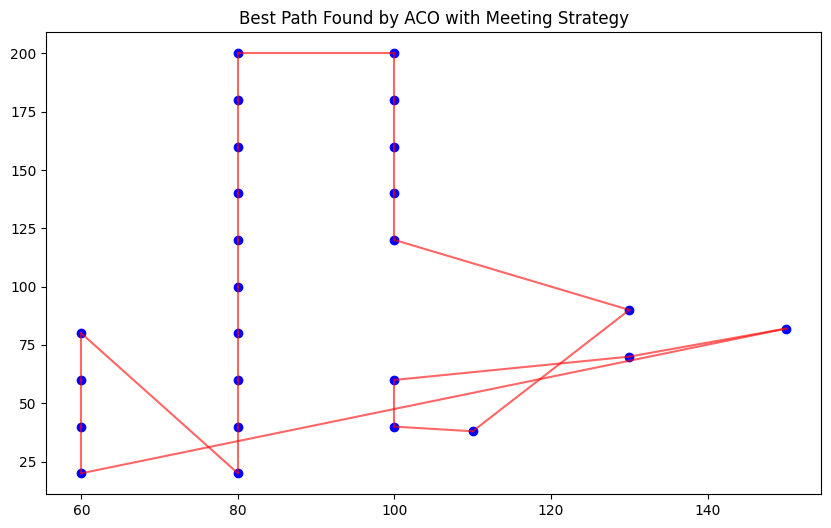

In [208]:
#Cell 8
# Running ACO with meeting strategy
best_path, best_distance = aco_meeting_strategy(citylist, num_ants, num_iterations, alpha, beta, rho, Q)

print(f"Best path found: {best_path}")
print(f"Distance of the best path: {best_distance}")

# Visualizing the best path
plt.figure(figsize=(10, 6))
plt.title('Best Path Found by ACO with Meeting Strategy')
plt.scatter([city.x for city in citylist], [city.y for city in citylist], color='blue')
for i in range(len(best_path)):
    start = citylist[best_path[i]]
    end = citylist[best_path[(i + 1) % len(best_path)]]
    plt.plot([start.x, end.x], [start.y, end.y], color='red', alpha=0.6)
plt.scatter
plt.show()